In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import keras
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score,f1_score

data = pd.read_csv('heart_failure.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

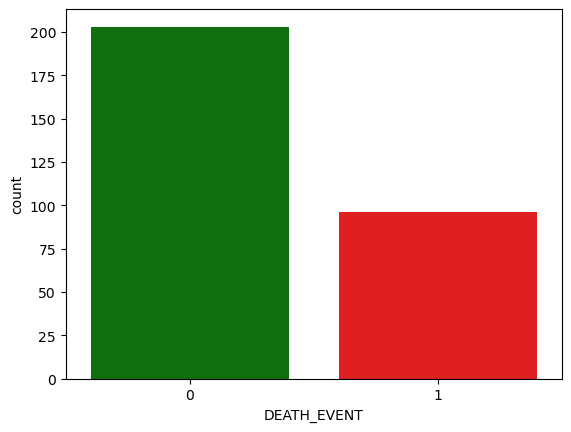

In [4]:
cols= ["green","red"]
sns.countplot(x= data["DEATH_EVENT"], palette= cols)

In [5]:
X=data.drop(["DEATH_EVENT"],axis=1)
y=data["DEATH_EVENT"]

In [6]:
col_names = list(X.columns)
s_scaler = StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.265205e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,3.594301e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,3.713120e-18,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,1.113936e-16,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,3.341808e-18,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,-4.841909e-16,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,1.009969e-16,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,-2.227872e-18,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.627435e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-5.940993e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


In [7]:
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=2)

In [8]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=30, 
    restore_best_weights=True)

model = Sequential()
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from tensorflow.keras.optimizers import SGD
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 1s 39ms/step - loss: 0.6929 - accuracy: 0.6407 - val_loss: 0.6923 - val_accuracy: 0.6429
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6919 - accuracy: 0.6587 - val_loss: 0.6915 - val_accuracy: 0.6429
Epoch 3/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.6587 - val_loss: 0.6906 - val_accuracy: 0.6429
Epoch 4/500
6/6 [==============================] - 0s 5ms/step - loss: 0.6901 - accuracy: 0.6587 - val_loss: 0.6898 - val_accuracy: 0.6429
Epoch 5/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.6587 - val_loss: 0.6889 - val_accuracy: 0.6429
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6881 - accuracy: 0.6587 - val_loss: 0.6880 - val_accuracy: 0.6429
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.6587 - val_loss: 0.6870 - val_accuracy: 0.6429
Epoch 8/500
6/6 [=========

6/6 [==============================] - 0s 6ms/step - loss: 0.4641 - accuracy: 0.6587 - val_loss: 0.5109 - val_accuracy: 0.6429
Epoch 60/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4673 - accuracy: 0.6587 - val_loss: 0.5090 - val_accuracy: 0.6429
Epoch 61/500
6/6 [==============================] - 0s 6ms/step - loss: 0.4466 - accuracy: 0.6587 - val_loss: 0.5109 - val_accuracy: 0.6429
Epoch 62/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4835 - accuracy: 0.6587 - val_loss: 0.5111 - val_accuracy: 0.6429
Epoch 63/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4701 - accuracy: 0.6587 - val_loss: 0.5108 - val_accuracy: 0.6429
Epoch 64/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4507 - accuracy: 0.6587 - val_loss: 0.5103 - val_accuracy: 0.7381
Epoch 65/500
6/6 [==============================] - 0s 5ms/step - loss: 0.4245 - accuracy: 0.8263 - val_loss: 0.5107 - val_accuracy: 0.7381
Epoch 66/500
6/6 [===============

In [10]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 65.59%


In [11]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

3/3 [==============================] - 0s 2ms/step


In [12]:
y_test

179    0
221    0
226    0
7      1
173    0
      ..
155    0
71     0
277    0
219    0
128    0
Name: DEATH_EVENT, Length: 90, dtype: int64

<AxesSubplot:>

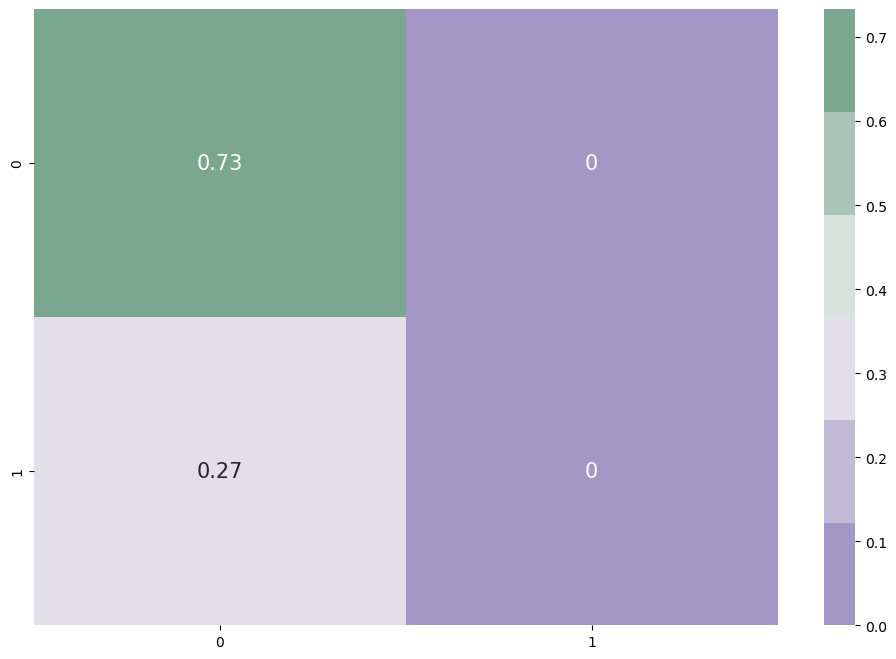

In [13]:
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})